# Variáveis Aleatórias

Uma variável aleatória é aquela que assume valores de acordo com dada chance. Ao discutir variáveis aleatórias, normalmente as descrevemos em termos de distribuições de probabilidade. Ou seja, a probabilidade de cada valor possa ser amostrado da variável aleatória. O exemplo clássico disso é um dado, que pode produzir os valores 1-6 com probabilidade uniforme.

Normalmente, separamos variáveis aleatórias em duas classes diferentes:

- Variáveis aleatórias discretas  
- Variáveis aleatórias contínuas  

Cada variável aleatória segue uma distribuição de probabilidade, uma função que a descreve. A distribuição de probabilidade atribui probabilidades a todos os valores possíveis de uma variável aleatória. Para uma determinada variável aleatória $X$, expressamos a probabilidade de que $X$ seja igual a um valor $x$ como $P (X = x)$. Para variáveis aleatórias discretas, podemos expressar $p (x) = P (X = x)$. Isso também é conhecido como a função *massa de probabilidade (PMF)*. Para variáveis aleatórias contínuas, não podemos usar um *PMF*, como abordaremos mais tarde, e devemos utilizar a *função densidade de probabilidade (PDF)* em seu lugar. As distribuições de probabilidade formam a base para modelos estatísticos descritivos. A compreensão delas também é necessária para realizar simulações de Monte Carlo.

Para cada função de distribuição de probabilidade, também temos uma *função distribuição acumulada (CDF)*. Isso é definido como $P (X ≤ x)$, a probabilidade de que a variável aleatória seja menor ou igual a um valor específico. A abreviatura para o *CDF* é $F (x) = P (X≤x)$. Para encontrar $F (x)$ no caso discreto, resumimos os valores do *PMF* para todos os resultados inferiores ou iguais a $x$. No caso contínuo, usamos o cálculo para integrar o *PDF* em todos os valores até $x$.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from statsmodels.stats import stattools

import pandas_datareader.data as web
import datetime

%matplotlib inline

## Variáveis Aleatórias Discretas

Uma variável aleatória discreta é uma com um número finito de resultados. Cada um desses resultados tem uma probabilidade única associada. Considere uma moeda justa ou um dado, algumas das variáveis aleatórias uniformemente distribuídas mais básicas. Para a moeda, existem dois resultados possíveis, seja cara ou coroa, cada uma com uma probabilidade $ 1/2 $ de ocorrência. Variáveis aleatórias discretas nem sempre têm pesos iguais para todos os resultados. A unidade básica de uma variável aleatória discreta é a ** função massa de probabilidade ** (PMF), outro nome para a função de probabilidade $ p (x) $. O PMF, ou função de probabilidade, dá uma probabilidade, uma massa, a cada ponto no domínio da distribuição de probabilidade. Uma função de probabilidade tem duas propriedades principais:

1. $ 0≤p(x)≤1 $ porque todas as probabilidades estão no intervalo $ [0, 1] $
2. A soma de todas as probabilidades de $ p (x) $ em todos os valores de $X$ é igual a $ 1 $. Os pesos totais para todos os valores da variável aleatória devem somar $ 1 $.

Aqui vamos considerar alguns exemplos das distribuições de probabilidade discreta mais revalentes.

In [2]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high + 1, numberOfSamples)
        return samples

### Distribuição uniforme
O tipo mais básico de distribuição de probabilidade é a distribuição uniforme. Com uma distribuição uniforme discreta, o mesmo peso é atribuído a todos os resultados. Tome o exemplo de rodar um dado. Ele tem seis faces, numeradas $ 1 $ até $ 6 $, cada uma com probabilidade de ocorrer com chance de $ 1/6 $. Com isso, sabemos que o PMF deve ser $ p (x) = 1/6 $ para todos os valores de nossa variável aleatória uniforme $ X $.


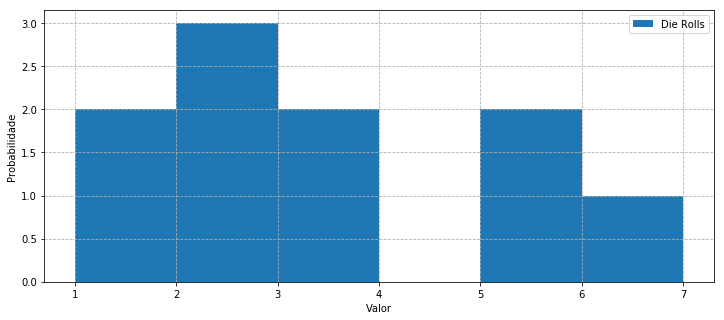

In [3]:
DieRolls = DiscreteRandomVariable(1, 6)
plt.figure(figsize=(12,5))
plt.hist(DieRolls.draw(10), bins = [1,2,3,4,5,6, 7], align = 'mid')
plt.xlabel('Valor')
plt.ylabel('Probabilidade');
plt.grid(linestyle='--')
plt.legend(['Die Rolls']);

Cada vez que rodamos o dado, temos a mesma chance de obter cada face. No curto prazo, isso parece desigual, mas se tomarmos muitas amostras, é evidente que cada face está ocorrendo a mesma porcentagem de ocorrências.

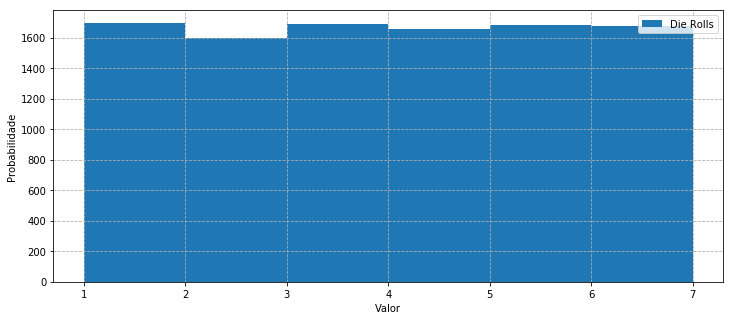

In [4]:
DieRolls = DiscreteRandomVariable(1, 6)
plt.figure(figsize=(12,5))
plt.hist(DieRolls.draw(10000), bins = [1,2,3,4,5,6, 7], align = 'mid')
plt.xlabel('Valor')
plt.ylabel('Probabilidade');
plt.grid(linestyle='--')
plt.legend(['Die Rolls']);

Então, com um dado, podemos ver facilmente que o $ p (x) = 1/6 $ para todos os valores da variável aleatória $ X $. Vejamos as possibilidades de todos os valores da função de probabilidade e da distribuição cumulativa:

Value: $X = x$ | PMF: $p(x) = P(X = x)$ | CDF: $F(x) = P(X \leq x)$ |
--- | --- | --- | 
1 | $1/6$ | $1/6$
2 | $1/6$ | $1/3$
3 | $1/6$ | $1/2$
4 | $1/6$ | $2/3$
5 | $1/6$ | $5/6$
6 | $1/6$ | $1$

Usando esta tabela, podemos ver facilmente que a função de probabilidade satisfaz as condições necessárias. Cada valor da função de probabilidade está no intervalo $ [0,1] $, satisfazendo a primeira condição. A segunda condição é satisfeita porque todos os valores de $ p (x) $ soma para $ 1 $, conforme evidenciado na função de distribuição cumulativa. Isto mostra duas propriedades da função de distribuição cumulativa:

1. O CDF está entre $ 0 $ e $ 1 $ para todos os $ x $. Isso é condizente com o valor da função de distribuição de probabilidade.
2. O CDF não é decrescente em $ x $. Isso significa que, à medida que $ x $ aumenta, o CDF aumenta ou permanece constante.

Ao tentar amostrar outras distribuições de probabilidade, podemos usar composições da distribuição uniforme com certas funções para obter as amostras apropriadas. No entanto, esse método pode ser tremendamente ineficiente. Como tal, usaremos as funções NumPy incorporadas para cada distribuição.

## Variables aleatórias contínuas
As variáveis aleatórias contínuas diferem das variáveis aleatórias discretas, na medida em que as contínuas podem levar infinitos resultados diferentes. Eles não podem ser contados ou descritos como uma lista. Como tal, significa muito pouco quando atribuímos probabilidades individuais aos resultados. Porque há infinitos resultados possíveis, a probabilidade de atingir qualquer resultado individual tem uma probabilidade de 0.

Podemos resolver este problema tomando probabilidades em intervalos de valores. Isso é feito usando o cálculo, no entanto, para usar nossas técnicas de amostragem aqui, não precisamos usar nenhum. Para uma variável aleatória contínua $ P (X = 0) $ não temos resposta clara. Ao invés disso, procuraríamos algo mais como $ P (-1 <X <1) $. Para variáveis aleatórias contínuas, em vez de usar um PMF, definimos uma ** função de densidade de probabilidade ** (PDF),  $ f_X (x) $, de modo que podemos dizer:
$$ P (a <X <b) = \int_a ^ b f_X (x) dx $$

Semelhante ao nosso requisito para distribuições discretas de que todas as probabilidades somem $ 1 $, aqui exigimos que:


1. $f_X(x) \geq 0$ para todo valor de $X$
2. $P(-\infty < X < \infty) = \int_{-\infty}^{\infty} f_X(x) dx = 1$

Vale ressaltar que, porque a probabilidade em um ponto individual com uma distribuição contínua é de $ 0 $, as probabilidades nos pontos finais de um intervalo são $ 0 $. Portanto, $ P (a \leq X \leq b) = P (a <X \leq b) = P (a \leq X <B) = P (a <X <b) $. Se integrarmos o PDF em todas as possibilidades, no valor total possível, o valor deve ser $ 1 $.

In [5]:
class ContinuousRandomVariable:
    def __init__(self, a = 0, b = 1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.uniform(self.low, self.high, numberOfSamples)
        return samples

### Distribuição uniforme
A distribuição uniforme também pode ser definida dentro do quadro de uma variável aleatória contínua. Nós levamos $ a $ e $ b $ para ser constante, onde $ b $ é o valor mais alto possível e $ a $ é o menor valor possível que o resultado pode obter. Então o PDF de uma variável aleatória uniforme é:

$$f(x) = \begin{cases}\frac{1}{b - a} & \text{for $a < x < b$} \ ,0 & \text{do contrário}\end{cases}$$

Uma vez que esta função é definida em um intervalo contínuo, o PDF cobre todos os valores entre $ a $ e $ b $. Aqui temos um gráfico do PDF (sinta-se livre para variar os valores de $ a $ e $ b $):

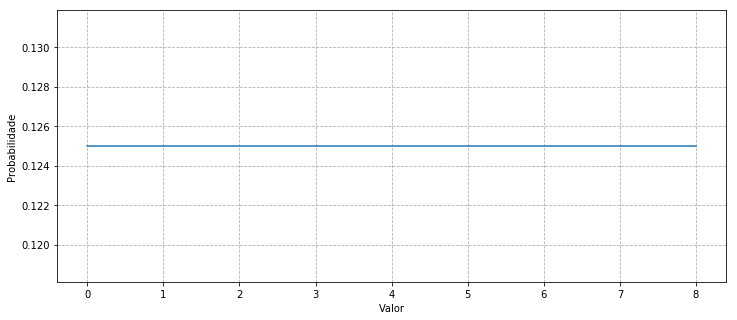

In [6]:
a = 0.0
b = 8.0
x = np.linspace(a, b, 100)
y = [1/(b-a) for i in x]
plt.figure(figsize=(12,5))
plt.plot(x, y)
plt.xlabel('Valor')
plt.ylabel('Probabilidade');
plt.grid(linestyle='--')

Como antes, no caso discreto uniforme, o PDF da distribuição uniforme contínua é constante para todos os valores que a variável pode assumir. A única diferença aqui é que não podemos tomar a probabilidade para qualquer ponto individual. O CDF, que recebemos da integral do PDF é:

$$ F(x) = \begin{cases} 0 & \text{for $x \leq a$} \ \frac{x - a}{b - a} ,& \text{para $a < x < b$} \ 1 ,& \text{para $x \geq b$}\end{cases}$$

E é plotado no mesmo intervalo que o PDF como:

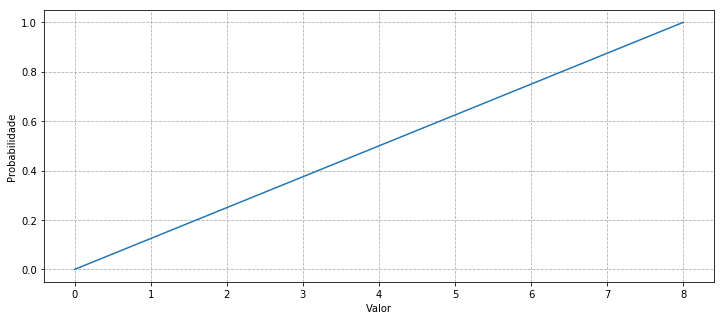

In [7]:
y = [(i - a)/(b - a) for i in x]
plt.figure(figsize=(12,5))
plt.plot(x, y)
plt.xlabel('Valor')
plt.ylabel('Probabilidade');
plt.grid(linestyle='--')

### Distribuição normal
A distribuição normal é uma distribuição muito comum e importante em estatística. Muitos testes e métodos importantes em estatística são baseados na suposição de normalidade. Uma grande parte disso é devido aos resultados do *Teorema do Limite Central (CLT)*, que afirma que amostras suficientemente grandes de ensaios independentes são normalmente distribuídos.

In [8]:
class NormalRandomVariable(ContinuousRandomVariable):
    def __init__(self, mean = 0, variance = 1):
        ContinuousRandomVariable.__init__(self)
        self.variableType = "Normal"
        self.mean = mean
        self.standardDeviation = np.sqrt(variance)
        return
    def draw(self, numberOfSamples):
        samples = np.random.normal(self.mean, self.standardDeviation, numberOfSamples)
        return samples

Ao descrever uma variável aleatória normal, só precisamos saber sua média ($ \mu $) e variância ($ \sigma ^ 2 $, onde $ \sigma $ é o desvio padrão). Denotamos uma variável aleatória $ X $ como uma variável aleatória normal, dizendo $ X $ ** ~ ** $ N (\mu, \sigma ^ 2) $. Uma das principais características de uma variável aleatória normal é que uma combinação linear de duas ou mais variáveis aleatórias normais é outra variável aleatória normal. Até este ponto, consideramos apenas distribuições de probabilidade variáveis únicas ou univariadas. Quando queremos descrever variáveis aleatórias ao mesmo tempo, podemos olhar para uma distribuição multivariada. Uma distribuição normal multivariada é descrita inteiramente pelas médias de cada variável, suas variâncias e as correlações distintas entre cada par de variáveis.

O PDF de uma variável aleatória normal é:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

E é definido por $ - \infty <x <\infty $. Quando temos $ \mu = 0 $ e $ \sigma = 1 $, chamamos isso de distribuição normal padrão.

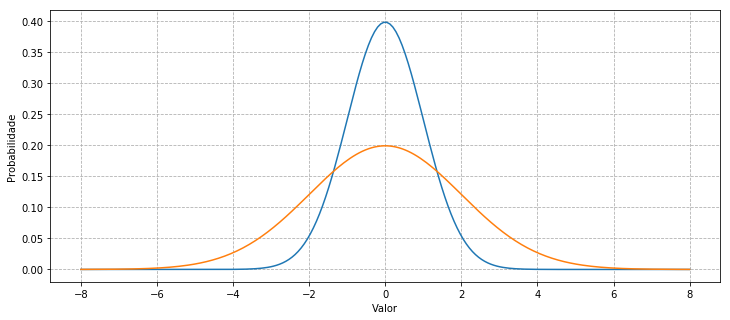

In [9]:
mu_1 = 0
mu_2 = 0
sigma_1 = 1
sigma_2 = 2
x = np.linspace(-8, 8, 200)
y = (1/(sigma_1 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_1)*(x - mu_1) / (2 * sigma_1 * sigma_1))
z = (1/(sigma_2 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_2)*(x - mu_2) / (2 * sigma_2 * sigma_2))
plt.figure(figsize=(12,5))
plt.plot(x, y, x, z)
plt.xlabel('Valor')
plt.ylabel('Probabilidade');
plt.grid(linestyle='--')

Ao alterar o desvio padrão e médio da distribuição normal, podemos alterar a profundidade e a largura da curva. Com um desvio padrão maior, os valores da distribuição são menos concentrados em torno da média.
Dada a média e variância de uma distribuição normal, podemos fazer as seguintes afirmações:

* Cerca de $68\%$ de todas as amostras encontram-se um desvio padrão ao redor da média ($\mu \pm \sigma$)
* Cerca de $95\%$ de todas as amostras encontram-se dentro de duas vezes o desvio padrão ao redor da média ($\mu \pm 2\sigma$)
* Cerca de $99\%$ de todas as amostras encontram-se dentro de três vezes o desvio padrão ao redor da média ($\mu \pm 3\sigma$)

Esses valores são importantes para a compreensão dos intervalos de confiança em relação à distribuição normal.

Usando o teorema do limite central, podemos padronizar variáveis aleatórias diferentes para que elas se tornem variáveis aleatórias normais. Uma ferramenta muito comum nas estatísticas é uma tabela de probabilidade padrão normal, usada para pesquisar os valores da CDF padrão normal para valores dados de $ x $. Ao transformar variáveis aleatórias em um padrão normal, podemos simplesmente verificar essas tabelas para valores de probabilidade. Nós padronizamos uma variável aleatória $ X $ subtraindo a média e a divisão pela variância, resultando na variável aleatória normal padrão $ Z $.

$$
Z = \frac{X - \mu}{\sigma}
$$

Vejamos o caso em que $ X $ ** ~ ** $ B (n, p) $ é uma variável aleatória binomial. No caso de uma variável aleatória binomial, a média é $ \ mu = np $ e a variância é $ \ sigma ^ 2 = np (1 - p) $.

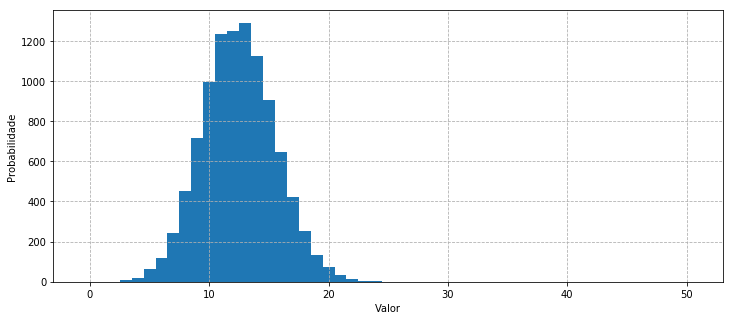

In [10]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return samples

n = 50
p = 0.25
X = BinomialRandomVariable(n, p)
X_samples = X.draw(10000)
Z_samples = (X_samples - n * p) / np.sqrt(n * p * (1 - p))
plt.figure(figsize=(12,5))
plt.hist(X_samples, bins = range(0, n + 2), align = 'left')
plt.xlabel('Valor')
plt.ylabel('Probabilidade');
plt.grid(linestyle='--')

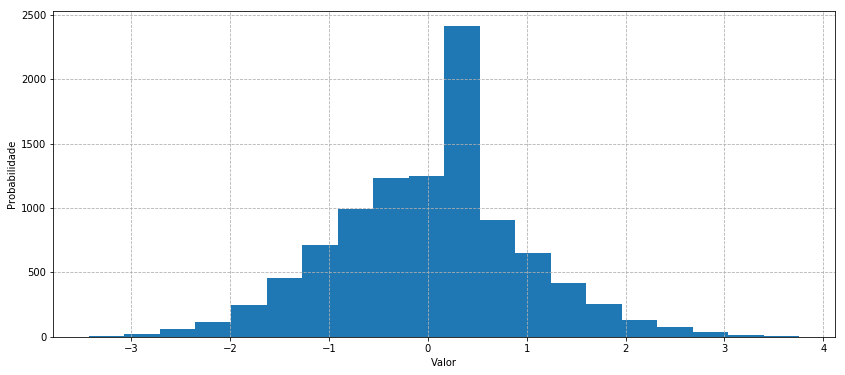

In [11]:
plt.figure(figsize=(14,6))
plt.hist(Z_samples, bins=20)
plt.xlabel('Valor')
plt.ylabel('Probabilidade');
plt.grid(linestyle='--')

A ideia de que podemos padronizar variáveis aleatórias é muito importante. Ao mudar uma variável aleatória para uma distribuição com a qual estamos mais familiarizados, a distribuição normal padrão, podemos responder facilmente a todas as questões de probabilidade que temos sobre a variável original. Isso é dependente, no entanto, de termos um numero de amostras suficientemente grande.

# Ajustando uma distribuição

Agora, tentaremos ajustar uma distribuição de probabilidade. Tomaremos os retornos de Apple e tentaremos adequá-los a uma distribuição normal. A primeira coisa a verificar é se os retornos realmente exibem propriedades de uma distribuição normal. Para este propósito, usaremos o teste Jarque-Bera, que indica não-normalidade se o valor p estiver abaixo de um ponto de corte.

In [12]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 1, 1)

symbol = 'AAPL.US'

prices = web.DataReader(symbol, 'quandl', start, end)['Close']
prices.head()

Date
2016-12-30    115.82
2016-12-29    116.73
2016-12-28    116.76
2016-12-27    117.26
2016-12-23    116.52
Name: Close, dtype: float64

O valor-p do teste de Jarque-Bera é:  2.0825657463043385e-47
Rejeitada a hipótese dos dados serem normalmente distribuídos? True
A assimetria (skewness) dos retornos é:  0.44377752621596717
A curtose (kurtosis) dos retornos é:  7.446088253891412


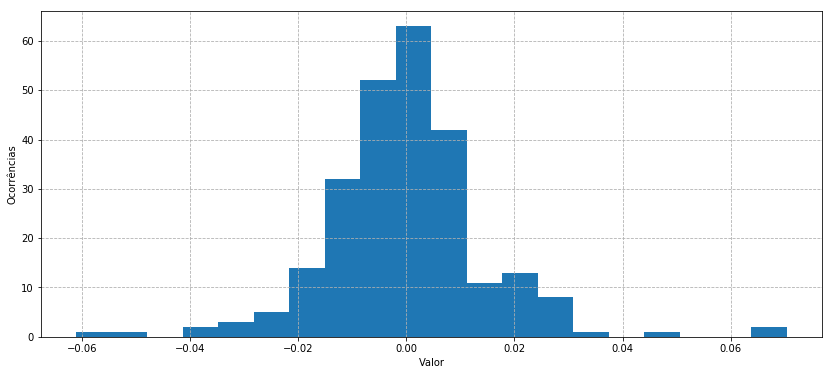

In [13]:
returns = prices.pct_change()[1:]

#Set a cutoff
cutoff = 0.01

# Get the p-value of the JB test
_, p_value, skewness, kurtosis = stattools.jarque_bera(returns)
print("O valor-p do teste de Jarque-Bera é: ", p_value)
print("Rejeitada a hipótese dos dados serem normalmente distribuídos?", p_value < cutoff)
print("A assimetria (skewness) dos retornos é: ", skewness)
print("A curtose (kurtosis) dos retornos é: ", kurtosis)
plt.figure(figsize=(14,6))
plt.hist(returns, bins = 20)
plt.xlabel('Valor')
plt.ylabel('Ocorrências');
plt.grid(linestyle='--')

O baixo valor-p do teste JB nos leva a * rejeitar * a hipótese nula de que os retornos são normalmente distribuídos. Isto é devido à alta curtose (distribuições normais têm uma curtose de $ 3 $).

Procederemos daqui, assumindo que os retornos são normalmente distribuídos para que possamos passar pelas etapas de adequação de uma distribuição. Em seguida, calculamos a média da amostra e o desvio padrão da série.

In [14]:
# Take the sample mean and standard deviation of the returns
sample_mean = np.mean(returns)
sample_std_dev = np.std(returns)

Agora, vejamos como uma curva normal teórica se encaixa nos valores reais.

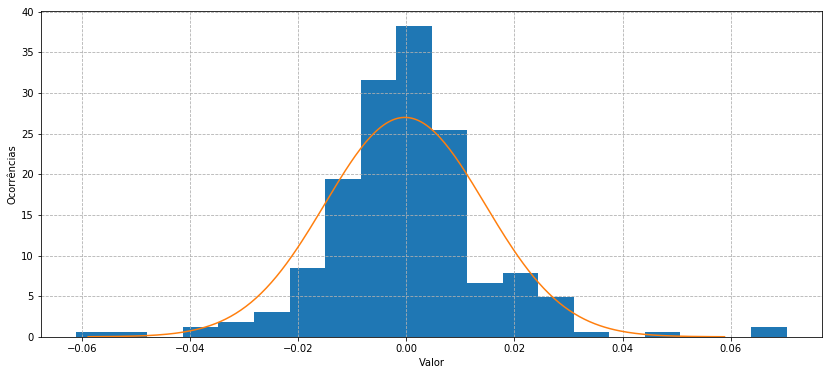

In [15]:
x = np.linspace(-(sample_mean + 4 * sample_std_dev), (sample_mean + 4 * sample_std_dev), len(returns))
sample_distribution = ((1/np.sqrt(sample_std_dev * sample_std_dev * 2 * np.pi)) * 
                       np.exp(-(x - sample_mean)*(x - sample_mean) / (2 * sample_std_dev * sample_std_dev)))
plt.figure(figsize=(14,6))
plt.hist(returns, bins = 20, density = True);
plt.plot(x, sample_distribution)
plt.xlabel('Valor')
plt.ylabel('Ocorrências');
plt.grid(linestyle='--')

Nossa curva teórica para os retornos tem um pico substancialmente mais baixo do que os valores reais, o que faz sentido porque os retornos não são realmente distribuídos normalmente. Isto é novamente devido à curtose da distribuição normal. Os retornos têm um valor de curtose de cerca de $ 7.44 $, enquanto a curtose da distribuição normal é de $ 3 $. Uma maior segmentação leva a um pico mais elevado. No entanto, é extremamente difícil encontrar dados do mundo real que se encaixem bem nas suposições de normalidade.

Geralmente, ao tentar ajustar uma distribuição de probabilidade aos valores do mundo real, devemos ter uma distribuição particular (ou distribuições) em mente. Há uma variedade de testes para diferentes distribuições que podemos aplicar para ver o que poderia ser o melhor. Além disso, à medida que mais informações estiverem disponíveis, será necessário atualizar a média da amostra e o desvio padrão ou talvez até encontrar uma distribuição diferente para refletir mais precisamente as novas informações. A forma da distribuição mudará em conformidade.